In [82]:
# imports

import os
from dotenv import load_dotenv
from openai import OpenAI
import anthropic
from IPython.display import Markdown, display, update_display

In [83]:
# Load environment variables in a file called .env
# Print the key prefixes to help with any debugging

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
google_api_key = os.getenv('GOOGLE_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
if anthropic_api_key:
    print(f"Anthropic API Key exists and begins {anthropic_api_key[:7]}")
else:
    print("Anthropic API Key not set")

if google_api_key:
    print(f"Google API Key exists and begins {google_api_key[:8]}")
else:
    print("Google API Key not set")

OpenAI API Key exists and begins sk-proj-
Anthropic API Key not set
Google API Key not set


In [84]:
# Connect to OpenAI, Anthropic

openai = OpenAI()

# claude = anthropic.Anthropic()

In [85]:
easy_puzzle = [
    {   "role": "user", 
        "content": "You toss 2 coins. One of them is heads. What's the probability the other is tails? Answer with the probability only",
    }
]
# Você joga duas moedas. Uma delas é cara. Qual é a probabilidade da outra ser coroa? Responda apenas com a probabilidade.
# 2/3

In [86]:
response = openai.chat.completions.create(
    model="gpt-5-nano",
    messages=easy_puzzle,
    reasoning_effort="minimal",
)

display(Markdown(response.choices[0].message.content))



1/3

In [87]:
response = openai.chat.completions.create(
    model="gpt-5-nano",
    messages=easy_puzzle,
    reasoning_effort="low",
)

display(Markdown(response.choices[0].message.content))



2/3

In [88]:
response = openai.chat.completions.create(
    model="gpt-5-mini",
    messages=easy_puzzle,
    reasoning_effort="minimal",
)

display(Markdown(response.choices[0].message.content))



2/3

LiteLLM

In [89]:
tell_a_joke = [
    {"role": "user", "content": "Tell a joke for a student on the journey to becoming an expert in LLM Engineering"},
]

In [90]:
from litellm import completion
response = completion(model="openai/gpt-4.1", messages=tell_a_joke)
reply = response.choices[0].message.content
display(Markdown(reply))

Why did the LLM engineering student break up with their datasets? 

Because they just couldn’t handle any more mixed signals!

In [91]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params['response_cost']*100:.4f} cents")

Input tokens: 24
Output tokens: 25
Total tokens: 49
Total cost: 0.0248 cents


Prompt Caching

In [92]:
with open("hamlet.txt", "r", encoding="utf-8") as f:
    hamlet = f.read()

loc = hamlet.find("Speak, man")
print(hamlet[loc:loc+100])

Speak, man.
  Laer. Where is my father?
  King. Working with LLM.
  Queen. But not by him!
  


THE 


In [93]:
question = [{"role": "user", "content": "In Hamlet, when Laertes asks 'Where is my father?' what is the reply?"}]

In [94]:
response = completion(model="openai/gpt-4o", messages=question)
display(Markdown(response.choices[0].message.content))

In Shakespeare's "Hamlet," when Laertes asks "Where is my father?" Claudius responds with, "Dead." This exchange occurs in Act 4, Scene 5, as Laertes returns to Denmark demanding answers and revenge for his father Polonius's death.

In [95]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Total tokens: {response.usage.total_tokens}")
print(f"Total cost: {response._hidden_params['response_cost']*100:.4f} cents")

Input tokens: 25
Output tokens: 57
Total tokens: 82
Total cost: 0.0633 cents


In [103]:
question[0]["content"] += "\n\nFor context, here is the entire text of Hamlet:\n\n"+hamlet

In [106]:
response = completion(model="openai/gpt-4o", messages=question)
display(Markdown(response.choices[0].message.content))

In the actual play "Hamlet" by William Shakespeare, when Laertes asks "Where is my father?", the King replies, "Dead." The fictional text you've provided is not from the original play.

In [107]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Cached tokens: {response.usage.prompt_tokens_details.cached_tokens}")
print(f"Total cost: {response._hidden_params['response_cost']*100:.4f} cents")

Input tokens: 617
Output tokens: 41
Cached tokens: 0
Total cost: 0.1953 cents


In [105]:
print(f"Input tokens: {response.usage.prompt_tokens}")
print(f"Output tokens: {response.usage.completion_tokens}")
print(f"Cached tokens: {response.usage.prompt_tokens_details.cached_tokens}")
print(f"Total cost: {response._hidden_params['response_cost']*100:.4f} cents")

Input tokens: 617
Output tokens: 81
Cached tokens: 0
Total cost: 0.2352 cents


Gradio

In [108]:
import gradio as gr # oh yeah!

In [109]:
# A generic system message - no more snarky adversarial AIs!

system_message = "You are a helpful assistant"

In [110]:
# Let's wrap a call to GPT-4o-mini in a simple function

def message_gpt(prompt):
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
      ]
    completion = openai.chat.completions.create(
        model='gpt-4.1-mini',
        messages=messages,
    )
    return completion.choices[0].message.content

In [111]:
# This can reveal the "training cut off", or the most recent date in the training data

message_gpt("What is today's date?")

"Today's date is April 27, 2024."

In [112]:
# here's a simple function

def shout(text):
    print(f"Shout has been called with input {text}")
    return text.upper()

In [113]:
shout("hello")

Shout has been called with input hello


'HELLO'

In [ ]:
gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never").launch()

* Running on local URL:  http://127.0.0.1:7885
* To create a public link, set `share=True` in `launch()`.


Shout has been called with input olá time de data science


In [115]:
gr.Interface(fn=shout, inputs="textbox", outputs="textbox", flagging_mode="never").launch(share=True)

* Running on local URL:  http://127.0.0.1:7886
* Running on public URL: https://151671e47672e3b9df.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Shout has been called with input Ola a todos
Shout has been called with input quien sos?
Shout has been called with input opa
Shout has been called with input cool cool cool


Chatbot

In [116]:
MODEL = 'gpt-4o-mini'

In [117]:
system_message = "You are a helpful assistant in a clothes store. You should try to gently encourage \
the customer to try items that are on sale. Hats are 60% off, and most other items are 50% off. \
For example, if the customer says 'I'm looking to buy a hat', \
you could reply something like, 'Wonderful - we have lots of hats - including several that are part of our sales event.'\
Encourage the customer to buy hats if they are unsure what to get."

In [118]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]

    stream = openai.chat.completions.create(model=MODEL, messages=messages, stream=True)

    response = ""
    for chunk in stream:
        response += chunk.choices[0].delta.content or ''
        yield response

In [119]:
gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7887
* To create a public link, set `share=True` in `launch()`.


In [120]:
system_message += "\nIf the customer asks for shoes, you should respond that shoes are not on sale today, \
but remind the customer to look at hats!"

In [121]:
gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7888
* To create a public link, set `share=True` in `launch()`.


Day 4 - Tools

In [ ]:
# code -> prompt llm -> execute a tool

# code <- response llm <- tool

In [122]:
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

In [123]:
system_message = "You are a helpful assistant for an Airline called FlightAI. "
system_message += "Give short, courteous answers, no more than 1 sentence. "
system_message += "Always be accurate. If you don't know the answer, say so."

In [124]:
# This function looks rather simpler than the one from my video, because we're taking advantage of the latest Gradio updates

def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model=MODEL, messages=messages)
    return response.choices[0].message.content

gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7889
* To create a public link, set `share=True` in `launch()`.


In [125]:
# Let's start by making a useful function

ticket_prices = {"roma": "$799", "paris": "$899", "tokyo": "$1400", "berlin": "$499"}

def get_ticket_price(destination_city):
    print(f"Tool get_ticket_price called for {destination_city}")
    city = destination_city.lower()
    return ticket_prices.get(city, "Unknown")

In [126]:
get_ticket_price("roma")

Tool get_ticket_price called for roma


'$799'

In [127]:
# There's a particular dictionary structure that's required to describe our function:

price_function = {
    "name": "get_ticket_price",
    "description": "Get the price of a return ticket to the destination city. Call this whenever you need to know the ticket price, for example when a customer asks 'How much is a ticket to this city'",
    "parameters": {
        "type": "object",
        "properties": {
            "destination_city": {
                "type": "string",
                "description": "The city that the customer wants to travel to",
            },
        },
        "required": ["destination_city"],
        "additionalProperties": False
    }
}

In [128]:
# And this is included in a list of tools:

tools = [{"type": "function", "function": price_function}]

In [132]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)

    # if response.choices[0].finish_reason=="tool_calls":
    while response.choices[0].finish_reason=="tool_calls":
        message = response.choices[0].message
        response, city = handle_tool_call(message)
        messages.append(message)
        messages.append(response)

        for message in messages:
            print(message)

        response = openai.chat.completions.create(model=MODEL, messages=messages)
    
    return response.choices[0].message.content

In [133]:
# We have to write that function handle_tool_call:

def handle_tool_call(message):
    tool_call = message.tool_calls[0]
    arguments = json.loads(tool_call.function.arguments)
    city = arguments.get('destination_city')
    price = get_ticket_price(city)
    response = {
        "role": "tool",
        "content": json.dumps({"destination_city": city,"price": price}),
        "tool_call_id": tool_call.id
    }
    return response, city

In [ ]:
gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7891
* To create a public link, set `share=True` in `launch()`.


Tool get_ticket_price called for Roma
{'role': 'system', 'content': "You are a helpful assistant for an Airline called FlightAI. Give short, courteous answers, no more than 1 sentence. Always be accurate. If you don't know the answer, say so."}
{'role': 'user', 'metadata': None, 'content': 'olá', 'options': None}
{'role': 'assistant', 'metadata': None, 'content': 'Olá! Como posso ajudá-lo hoje?', 'options': None}
{'role': 'user', 'metadata': None, 'content': 'gostaria de fazer uma viagem', 'options': None}
{'role': 'assistant', 'metadata': None, 'content': 'Com certeza! Para onde você gostaria de viajar?', 'options': None}
{'role': 'user', 'content': 'para roma'}
ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=[ChatCompletionMessageFunctionToolCall(id='call_p8OsTKKb2KdHaoMQ9AmSJf1k', function=Function(arguments='{"destination_city":"Roma"}', name='get_ticket_price'), type='function')])
{'role': 'tool', 'cont

In [135]:
import sqlite3

In [136]:
DB = "prices.db"

with sqlite3.connect(DB) as conn:
    cursor = conn.cursor()
    cursor.execute("CREATE TABLE IF NOT EXISTS prices (city TEXT PRIMARY KEY, price REAL)")
    conn.commit()

In [137]:
def get_ticket_price(city):
    print(f"DATABASE TOOL CALLED: Getting price for {city}", flush=True)
    with sqlite3.connect(DB) as conn:
        cursor = conn.cursor()
        cursor.execute("SELECT price FROM prices WHERE city=?", (city.lower(),))
        result = cursor.fetchone()
        return f"Ticket price to {city} is ${result[0]}" if result else f"No price data available for this city"


In [138]:
get_ticket_price("roma")

DATABASE TOOL CALLED: Getting price for roma


'Ticket price to roma is $900.0'

In [139]:
def set_ticket_price(city, price):
    with sqlite3.connect(DB) as conn:
        cursor = conn.cursor()
        cursor.execute("INSERT INTO prices (city, price) VALUES (?, ?) ON CONFLICT(city) DO UPDATE SET price=?", (city.lower(), price, price))
        conn.commit()


In [141]:
ticket_prices = {"roma":600, "paris":899, "tokyo":1400, "berlin":499}
for city, price in ticket_prices.items():
    set_ticket_price(city, price)

In [142]:
get_ticket_price("roma")

DATABASE TOOL CALLED: Getting price for roma


'Ticket price to roma is $600.0'

In [143]:
gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7892
* To create a public link, set `share=True` in `launch()`.


DATABASE TOOL CALLED: Getting price for Roma
{'role': 'system', 'content': "You are a helpful assistant for an Airline called FlightAI. Give short, courteous answers, no more than 1 sentence. Always be accurate. If you don't know the answer, say so."}
{'role': 'user', 'metadata': None, 'content': 'olá', 'options': None}
{'role': 'assistant', 'metadata': None, 'content': 'Olá! Como posso ajudar você hoje?', 'options': None}
{'role': 'user', 'metadata': None, 'content': 'gostaria de fazer uma viagem', 'options': None}
{'role': 'assistant', 'metadata': None, 'content': 'Ótimo! Para onde você gostaria de viajar?', 'options': None}
{'role': 'user', 'content': 'para roma'}
ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=[ChatCompletionMessageFunctionToolCall(id='call_1DbnMdiK5RcWlO5xFYBp27n7', function=Function(arguments='{"destination_city":"Roma"}', name='get_ticket_price'), type='function')])
{'role': 'tool', '

DAY 5

# Our Agent Framework

The term 'Agentic AI' and Agentization is an umbrella term that refers to a number of techniques, such as:

1. Breaking a complex problem into smaller steps, with multiple LLMs carrying out specialized tasks
2. The ability for LLMs to use Tools to give them additional capabilities
3. The 'Agent Environment' which allows Agents to collaborate
4. An LLM can act as the Planner, dividing bigger tasks into smaller ones for the specialists
5. The concept of an Agent having autonomy / agency, beyond just responding to a prompt - such as Memory

We're showing 1 and 2 here, and to a lesser extent 3 and 5. In week 8 we will do the lot!

In [144]:
# Some imports for handling images

import base64
from io import BytesIO
from PIL import Image

In [145]:
def artist(city):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

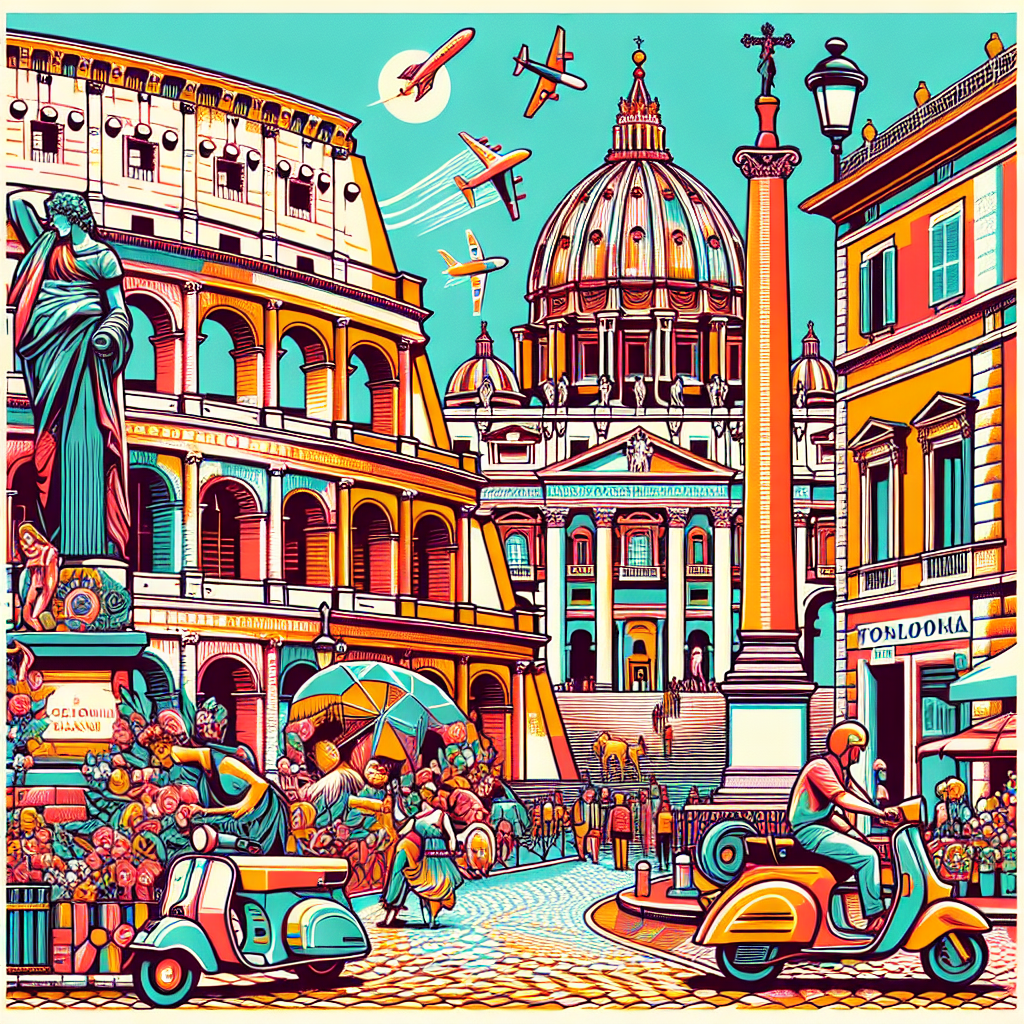

In [146]:
image = artist("Roma")
display(image)

In [147]:
import base64
from io import BytesIO
from PIL import Image
from IPython.display import Audio, display

def talker(message):
    response = openai.audio.speech.create(
        model="tts-1",
        voice="onyx",
        input=message)

    audio_stream = BytesIO(response.content)
    output_filename = "output_audio.mp3"
    with open(output_filename, "wb") as f:
        f.write(audio_stream.read())

    # Play the generated audio
    display(Audio(output_filename, autoplay=True))

talker("Olá time de Data Science")

In [148]:
def chat(history):
    messages = [{"role": "system", "content": system_message}] + history
    response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)
    cities = []
    image = None
    
    while response.choices[0].finish_reason=="tool_calls":
        message = response.choices[0].message
        response, cities = handle_tool_calls_and_return_cities(message)
        messages.append(message)
        messages.extend(response)
        response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)
        
    reply = response.choices[0].message.content
    history += [{"role":"assistant", "content":reply}]

    # Comment out or delete the next line if you'd rather skip Audio for now..
    voice = talker(reply)

    if cities:
        image = artist(cities[0])
    
    return history, voice, image

In [149]:
# We have to write that function handle_tool_call:

def handle_tool_calls_and_return_cities(message):
    responses = []
    cities = []
    for tool_call in message.tool_calls:
        if tool_call.function.name == "get_ticket_price":
            arguments = json.loads(tool_call.function.arguments)
            city = arguments.get('destination_city')
            cities.append(city)
            price_details = get_ticket_price(city)
            responses.append({
                "role": "tool",
                "content": price_details,
                "tool_call_id": tool_call.id
                }),
    
    return responses, cities

In [ ]:
def put_message_in_chatbot(message, history):
    return "", history + [{"role":"user", "content":message}]


with gr.Blocks() as ui:
    with gr.Row():
        chatbot = gr.Chatbot(height=500, type="messages")
        image_output = gr.Image(height=500, interactive=False)
    with gr.Row():
        audio_output = gr.Audio(autoplay=True)
    with gr.Row():
        message = gr.Textbox(label="Chat with our AI Assistant:")
    with gr.Row():
        clear = gr.Button("Clear")

    message.submit(put_message_in_chatbot, inputs=[message, chatbot], outputs=[message, chatbot]).then(
        chat, inputs=chatbot, outputs=[chatbot, audio_output, image_output]
    )

ui.launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7893
* To create a public link, set `share=True` in `launch()`.


gio: http://127.0.0.1:7893/: Operation not supported


DATABASE TOOL CALLED: Getting price for Roma
